# Open Powerlifiting Datascience Project!

#### Libraries and Dependencies

In [91]:
import re
import json
import requests as r
from bs4 import BeautifulSoup as bs 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 

#### Getting the Data 

In [92]:
# Open powerlifting does not have an api so lets scape some data!!!
def scape_url(url):
    response = r.get(url)
    
    if response.status_code == 200:
        soup = bs(response.content, 'html.parser')
        pattern = re.compile(r'const initial_data = ({.*?});', re.DOTALL)
        match = pattern.search(str(soup))
        
        if match:
            initial_data_json = match.group(1)
            initial_data_dict = json.loads(initial_data_json)
            # Assuming 'rows' key exists in initial_data_dict
            rows = initial_data_dict.get('rows', [])
            # Now chuck these into a pandas dataframe 
            df = pd.DataFrame(rows, columns=['ID', 'Rank', 'Name', 'Name2', 'Tnstagram', 'Textcolor', 'Country', 'Location', 'Federation', 'Date', 'Country2', 'Region', 'Fed-version', 'Sex', 'Equiptment', 'Age', 'Age_Class', 'Weight', 'Weight_Class', 'Squat', 'Bench', 'Deadlift', 'Total', 'Dots'])
            
            return df 
            
        else:
            print("Error: 'const initial_data' not found in HTML content")
            return None
        
        
    else:
        print("Error: unable to retrieve data recieved error code: {response.status_code}")

# Url goes to endpoint showing all ferderations, all sexes, all weight classes, all years and full power and raw only (equipped is cheating)
open_powerlifting_url = "https://www.openpowerlifting.org/rankings/raw/full-power"

op_df = scape_url(open_powerlifting_url)

# Check that out datafram has been setup correctly
op_df.head()

# Now lets save this data for later! into a .csv file and timestamp it
op_df.to_csv('./data/csv/full-power-global-rankings.csv', index=False)
op_df.to_excel('./data/xls/full-power-global-rankings.xlsx', index=False, engine='openpyxl')

#### Cleaning the Data 

In [93]:
# Lets have a look at our data! and see what we can find within it or if we need to clean it a little!
op_df.head(10)

,ID,Rank,Name,Name2,Tnstagram,Textcolor,Country,Location,Federation,Date,...,Equiptment,Age,Age_Class,Weight,Weight_Class,Squat,Bench,Deadlift,Total,Dots
0,0,1,Kristy Hawkins,kristyhawkins,kristy_hawkins,green,USA,USA-CA,WRPF,2022-12-04,...,Raw,42,Open,73.6,75,265,150,272.5,687.5,676.36
1,1,2,John Haack,johnhaack,bilbo_swaggins181,None,USA,USA-CA,WRPF,2022-07-29,...,Raw,29,Open,89.9,90,345,267.5,410,1022.5,661.52
2,2,3,Marianna Gasparyan,mariannagasparyan,power_mayan,None,None,None,USPA,2019-08-03,...,Raw,30,Open,57.7,60,230,132.5,217.5,580,659.24
3,3,4,Chakera Ingram,chakeraingram,c.c_ingram,None,USA,USA-TX,USPA,2018-06-02,...,Raw,23,Juniors 20-23,81.5,82.5,245,165,282.5,692.5,646.55
4,4,5,Samantha Rice,samantharice,quadslikemom,None,USA,USA-TX,USA-UA,2023-04-08,...,Raw,32,Open,84.4,90,267.5,155,280,702.5,644.77
5,5,6,Hunter Henderson #1,hunterhenderson1,huntermhenderson,None,USA,None,WRPF,2023-02-18,...,Raw,28,Pro Open,81.4,82.5,267.5,152.5,250,670,625.92
6,6,7,Jamal Browner,jamalbrowner,jamal_b15,None,USA,USA-TX,USPA,2022-09-24,...,Raw,27,Open,109.4,110,370,227.5,455,1052.5,624.65
7,7,8,Raymond Phillips,raymondphillips,rayphillips1828,None,USA,USA-NJ,RPS,2024-01-27,...,Raw,38,Pro Open,63.6,67.5,276.6,163.2,331.1,771.1,620.75
8,8,9,Blake Lehew,blakelehew,deadliftingorangutan,None,USA,USA-TX,USA-UA,2023-04-08,...,Raw,27,Open,82.3,82.5,320,220,375,915,620.67
9,9,10,Jawon Garrison,jawongarrison,majin_avenger2.0,red,USA,USA-AL,WRPF,2023-10-28,...,Raw,35,Open,82.5,82.5,353,230,332.5,915.5,620.15


In [94]:
# As we can see there are a few repeating and redundant rows lets remove them
op_df.drop(['Name2', 'ID', 'Tnstagram', 'Textcolor', 'Country', 'Location', 'Country2', 'Region', 'Fed-version'], axis=1, inplace=True)

# Gaze at sexy cleansed data (It looks so much better now)
op_df.head(10)

,Rank,Name,Federation,Date,Sex,Equiptment,Age,Age_Class,Weight,Weight_Class,Squat,Bench,Deadlift,Total,Dots
0,1,Kristy Hawkins,WRPF,2022-12-04,F,Raw,42,Open,73.6,75,265,150,272.5,687.5,676.36
1,2,John Haack,WRPF,2022-07-29,M,Raw,29,Open,89.9,90,345,267.5,410,1022.5,661.52
2,3,Marianna Gasparyan,USPA,2019-08-03,F,Raw,30,Open,57.7,60,230,132.5,217.5,580,659.24
3,4,Chakera Ingram,USPA,2018-06-02,F,Raw,23,Juniors 20-23,81.5,82.5,245,165,282.5,692.5,646.55
4,5,Samantha Rice,USA-UA,2023-04-08,F,Raw,32,Open,84.4,90,267.5,155,280,702.5,644.77
5,6,Hunter Henderson #1,WRPF,2023-02-18,F,Raw,28,Pro Open,81.4,82.5,267.5,152.5,250,670,625.92
6,7,Jamal Browner,USPA,2022-09-24,M,Raw,27,Open,109.4,110,370,227.5,455,1052.5,624.65
7,8,Raymond Phillips,RPS,2024-01-27,M,Raw,38,Pro Open,63.6,67.5,276.6,163.2,331.1,771.1,620.75
8,9,Blake Lehew,USA-UA,2023-04-08,M,Raw,27,Open,82.3,82.5,320,220,375,915,620.67
9,10,Jawon Garrison,WRPF,2023-10-28,M,Raw,35,Open,82.5,82.5,353,230,332.5,915.5,620.15


#### Exploring the data

(100, 15)
             Rank
count  100.000000
mean    50.500000
std     29.011492
min      1.000000
25%     25.750000
50%     50.500000
75%     75.250000
max    100.000000


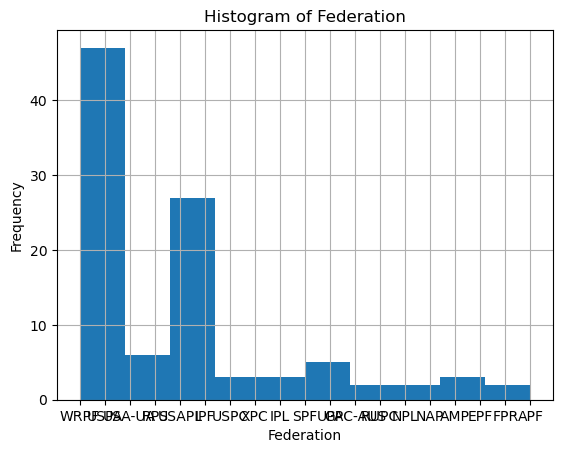

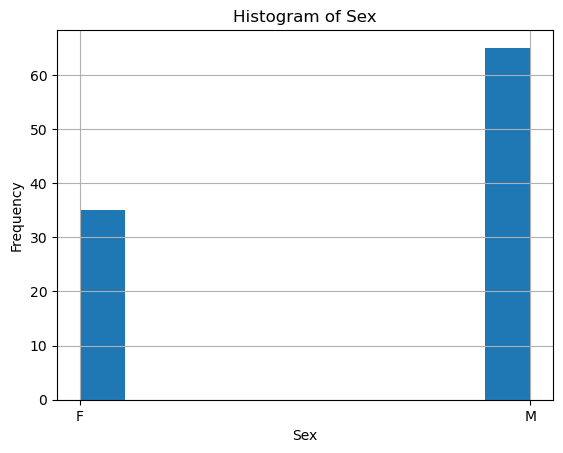

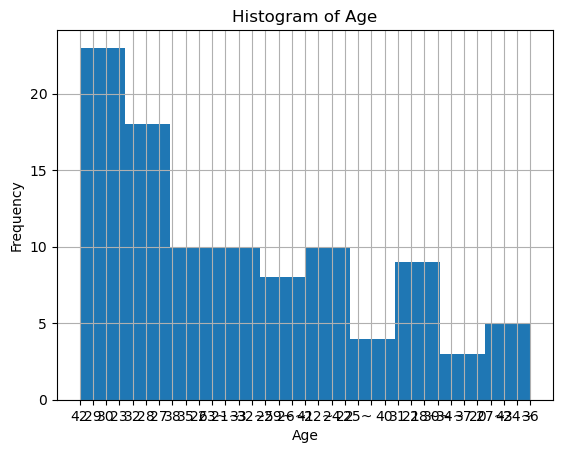

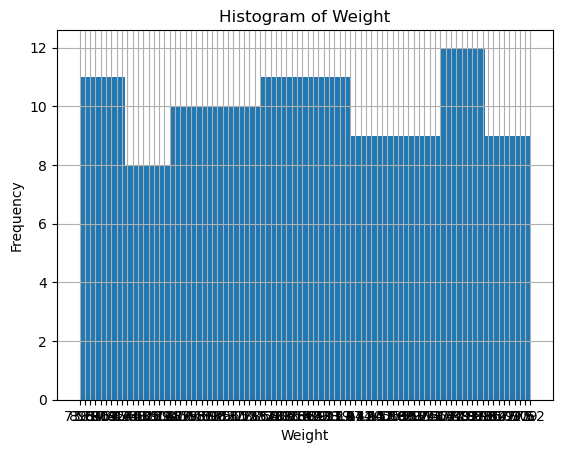

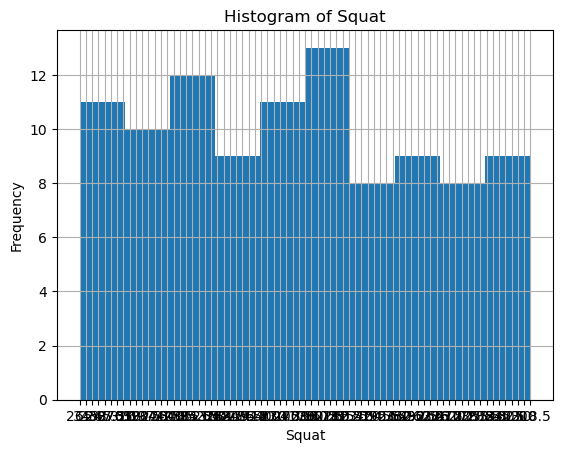

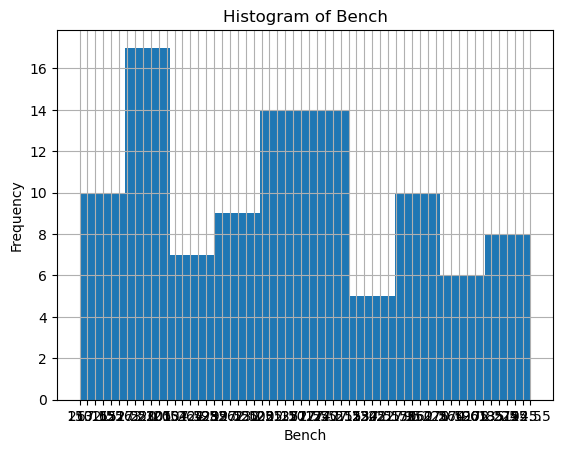

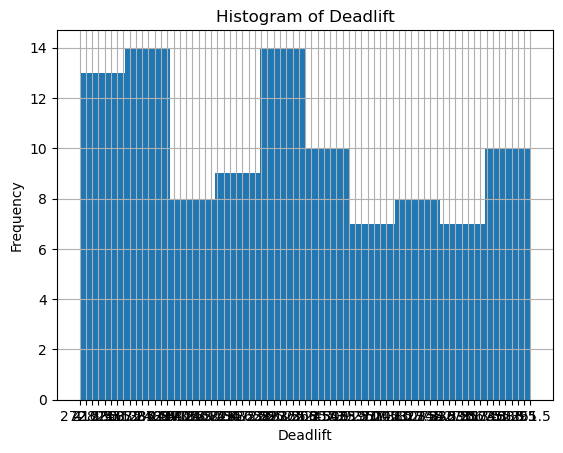

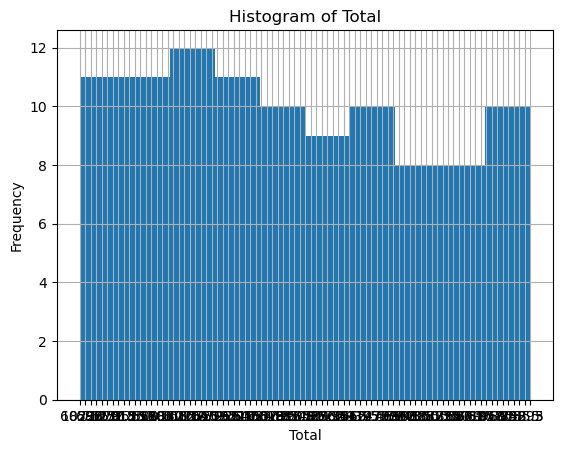

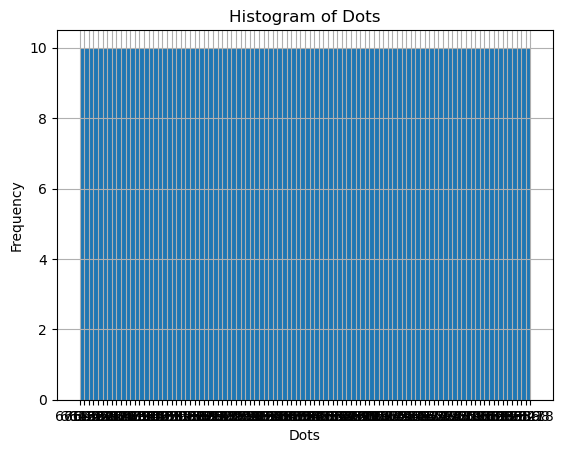

In [102]:
# Lets learn a little more about our dataset
print(op_df.shape)
# Cool so we know that we have the top 100 raw lifters in the world by dots score!!! 
print(op_df.describe())
# Sweet seems about right, lets do some data visualisations now!!!!!
hist_cols = ['Federation', 'Sex', 'Age', 'Weight', 'Squat', 'Bench', 'Deadlift', 'Total', 'Dots' ]
for column in hist_cols:
    plt.figure()
    plt.hist(op_df[column], bins=10)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
# looking at that I am intreged to see age being a primary factor with 42 being one of the most common ages which is quite interesting